[View in Colaboratory](https://colab.research.google.com/github/raahatg21/IMDB-Dataset-Sentiment-Analysis-with-Keras/blob/master/IMDB_RNN_2.ipynb)

# IMDB Dataset: Sentiement Analysis

**Using 1D Convnets + GRU layers, and Word Embeddings. 88.78% Validation Accuracy. 85.34% Testing Accuracy.**

In [0]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
from keras.datasets import imdb
from keras import models
from keras import layers
from keras.preprocessing.sequence import pad_sequences

Using TensorFlow backend.


In [0]:
max_features = 10000  # Only include top 10,000 words in the vocabulary
maxlen = 500  # Cut off each review after 500 words
batch_size = 32

In [0]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = max_features)

In [6]:
X_train.shape, X_test.shape

((25000,), (25000,))

In [7]:
y_train[1], y_train[2], y_test[4]

(0, 0, 1)

In [0]:
# Padding the data so that each sequence is of exactly 500 words

X_train = pad_sequences(X_train, maxlen = maxlen)
X_test = pad_sequences(X_test, maxlen = maxlen)

In [9]:
X_train.shape, X_test.shape

((25000, 500), (25000, 500))

In [0]:
# Building the Model

model = models.Sequential()
model.add(layers.Embedding(max_features, 32, input_length = maxlen))
model.add(layers.Conv1D(32, 5, activation = 'relu'))
model.add(layers.MaxPooling1D(3))
model.add(layers.Conv1D(32, 5, activation = 'relu'))
model.add(layers.MaxPooling1D(3))
model.add(layers.Dropout(0.2))
model.add(layers.CuDNNGRU(32))  # return_sequences = False
model.add(layers.Dense(1, activation = 'sigmoid'))

Since CuDNN doesn't support dropout and recurrent_dropout, we couldn't write the following:

model.add(layers.CuDNNLSTM(32, dropout = 0.1, recurrent_dropout = 0.5))

Hence, our model will be inferior in case of small datasets: https://github.com/keras-team/keras/issues/8935


In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 500, 32)           320000    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 496, 32)           5152      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 165, 32)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 161, 32)           5152      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 53, 32)            0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 53, 32)            0         
_________________________________________________________________
cu_dnngru_1 (CuDNNGRU)       (None, 32)                6336      
__________

In [0]:
# Compiling the Model

model.compile(loss = 'binary_crossentropy', optimizer = 'rmsprop', metrics = ['acc'])# Compiling the Model

In [15]:
# Training

history = model.fit(X_train, y_train, batch_size = batch_size, epochs = 15, validation_split = 0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/15
20000/20000 [==============================] - 16s 783us/step - loss: 0.4472 - acc: 0.7695 - val_loss: 0.3064 - val_acc: 0.8740
Epoch 2/15
20000/20000 [==============================] - 13s 672us/step - loss: 0.2504 - acc: 0.9019 - val_loss: 0.2967 - val_acc: 0.8806
Epoch 3/15
20000/20000 [==============================] - 13s 668us/step - loss: 0.1926 - acc: 0.9276 - val_loss: 0.2764 - val_acc: 0.8878
Epoch 4/15
20000/20000 [==============================] - 13s 674us/step - loss: 0.1542 - acc: 0.9434 - val_loss: 0.2954 - val_acc: 0.8926
Epoch 5/15
20000/20000 [==============================] - 13s 674us/step - loss: 0.1227 - acc: 0.9563 - val_loss: 0.3444 - val_acc: 0.8780
Epoch 6/15
20000/20000 [==============================] - 14s 677us/step - loss: 0.0939 - acc: 0.9669 - val_loss: 0.3279 - val_acc: 0.8868
Epoch 7/15
20000/20000 [==============================] - 14s 679us/step - loss: 0.0634 - acc: 0.9796 - val_loss: 0.3

In [0]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['acc']
val_acc = history.history['val_acc']

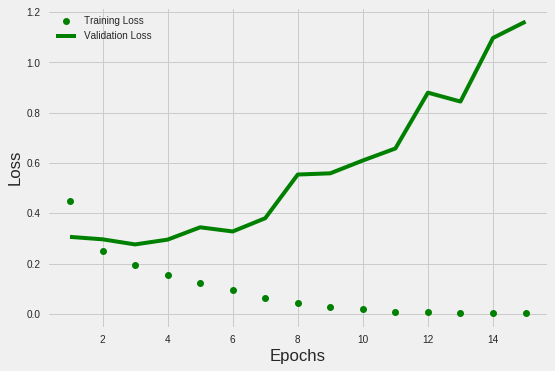

In [17]:
# Plotting Training and Validation Loss

epochs = range(1, 16)

plt.plot(epochs, loss, 'go', label = 'Training Loss')
plt.plot(epochs, val_loss, 'g', label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

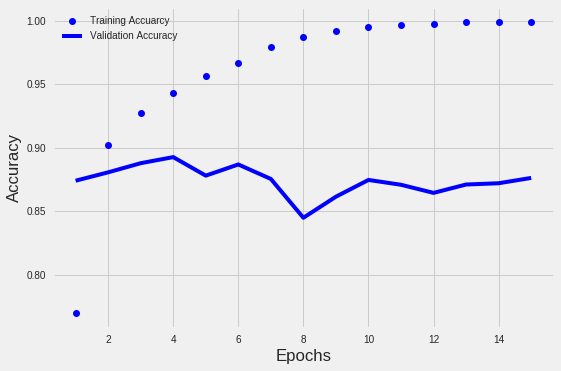

In [18]:
# Plotting Training and Validation Accuracy

plt.plot(epochs, acc, 'bo', label = 'Training Accuarcy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [19]:
# Testing

model.evaluate(X_test, y_test)

25000/25000 [==============================] - 5s 217us/step


[1.355736649626866, 0.85348]